# Linear Regression Analysis with Python

This notebook follows the same procedure as the R and Clojure examples, but implemented in Python.

Below I started the Python code, including the imports. Feel free to add/remove imports as you see fit. Remember, the Dockerfile was built for the below included libraries. As such, if you wish to add additional libraries, you will need to add them to the Dockerfile OR you can develop locally.

Also, you may want to write your own custom functions for plotting or computing or something else. You can write your own `utils/custom_functions.py` file and import it here.


In [60]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

import matplotlib.pyplot as plt
print(plt.style.available)

# Set plot style
plt.style.use('seaborn-v0_8')

# Plot MPG vs Horsepower
# Set plot style using Seaborn
sns.set(style='darkgrid')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


## Load data


In [61]:
# Load the dataset
autompg = pd.read_csv('../../data/autompg.csv')

# Display the first few rows and summary statistics
print(autompg.head())
print(autompg.describe())

    mpg  cyl   disp   hp    wt   acc  year
0  18.0    8  307.0  130  3504  12.0    70
1  15.0    8  350.0  165  3693  11.5    70
2  18.0    8  318.0  150  3436  11.0    70
3  16.0    8  304.0  150  3433  12.0    70
4  17.0    8  302.0  140  3449  10.5    70
              mpg         cyl        disp          hp           wt  \
count  390.000000  390.000000  390.000000  390.000000   390.000000   
mean    23.419487    5.479487  194.716667  104.574359  2980.353846   
std      7.815625    1.706886  104.825696   38.561917   850.689476   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.000000    4.000000  105.000000   75.000000  2223.750000   
50%     22.450000    4.000000  151.000000   94.500000  2811.000000   
75%     29.000000    8.000000  293.250000  128.000000  3618.250000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc        year  
count  390.000000  390.000000  
mean    15.547692   75.953846  
std      2.7626

## Plot data


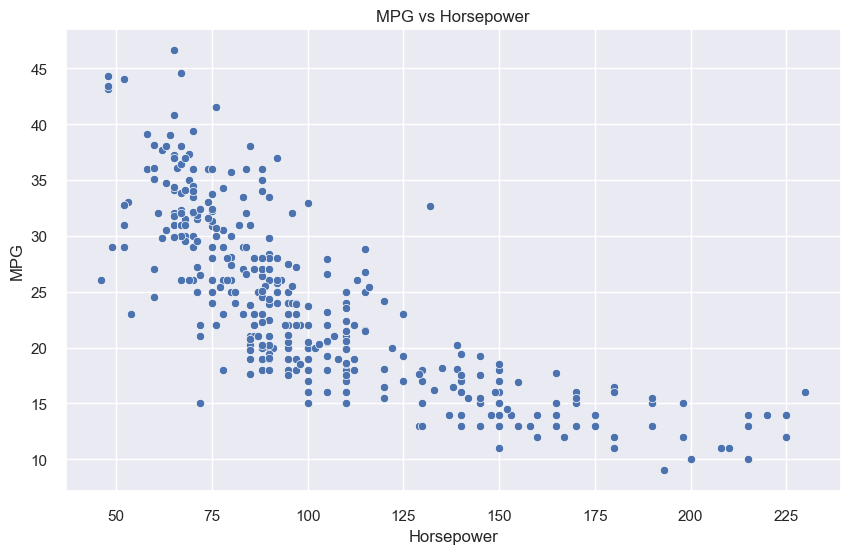

In [62]:
df = pd.DataFrame(autompg)

# Plot MPG vs Horsepower
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=df)
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

## Fit simple linear regression model


Intercept: 39.91169306778211
Coefficient: -0.1577079319447583
Mean Squared Error: 18.488657964184533
R-squared: 0.6054759717795415


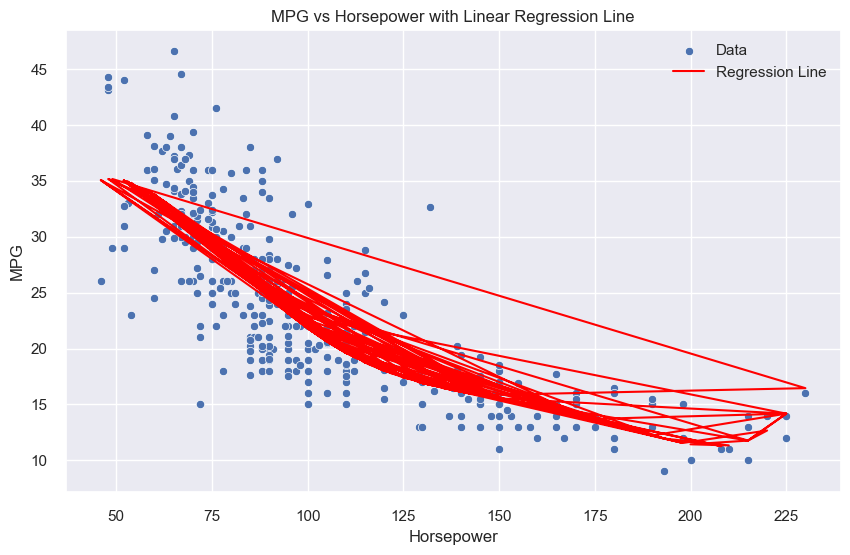

In [63]:
# Fit simple linear regression model
# Prepare the data
X = df[['hp']]  # Predictor variable
y = df['mpg']           # Target variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred_linear = model.predict(X)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Calculate and print performance metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred_linear)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=df, label='Data')
plt.plot(df['hp'], y_pred, color='red', label='Regression Line')
plt.title('MPG vs Horsepower with Linear Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

### Interpret your model

Add your model interpretation here.


## Predict


In [64]:
# Predict MPG for a car with 210 horsepower
horsepower_210 = np.array([[210]])
mpg_pred_210 = model.predict(horsepower_210)
print(f"Predicted MPG for a car with 210 horsepower: {mpg_pred_210[0]}")

Predicted MPG for a car with 210 horsepower: 6.793027359382869


/Users/jamievuong/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### View prediction on plot


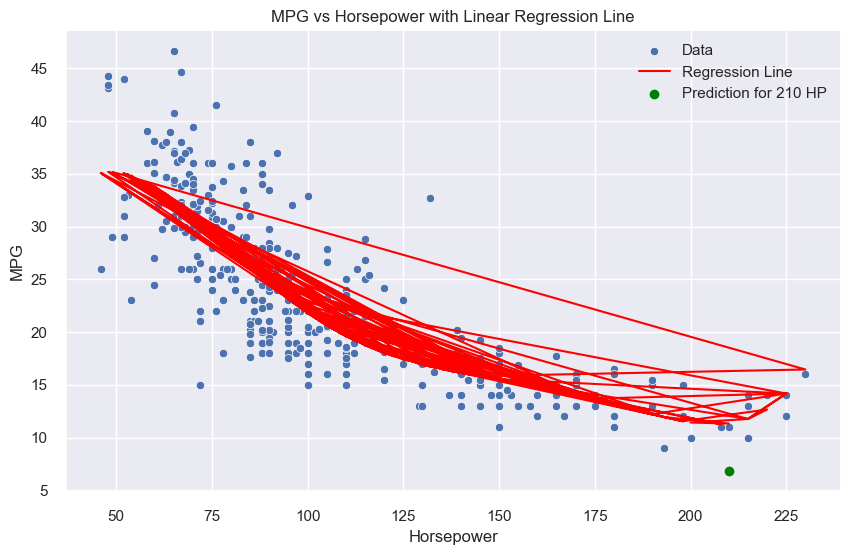

In [65]:
# Plot prediction
# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=df, label='Data')
plt.plot(df['hp'], y_pred, color='red', label='Regression Line')
plt.scatter(210, mpg_pred_210, color='green', label='Prediction for 210 HP', zorder=5)
plt.title('MPG vs Horsepower with Linear Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

## Fit polynomial regression models


Intercept: 56.882455951828064
Coefficients: [ 0.         -0.4662114   0.00123124]
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     425.4
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.94e-98
Time:                        15:40:42   Log-Likelihood:                -1128.0
No. Observations:                 390   AIC:                             2262.
Df Residuals:                     387   BIC:                             2274.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

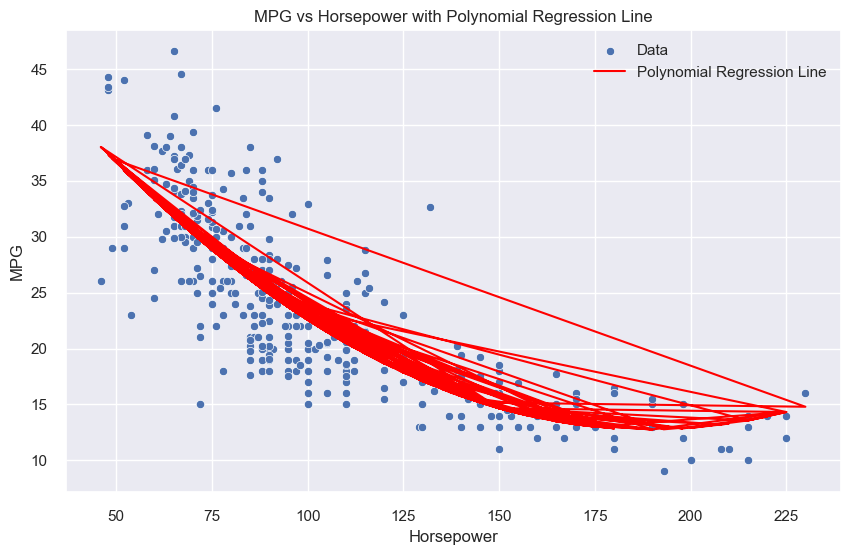

In [66]:
# Degree 2 polynomial
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred_poly2 = model.predict(X_poly)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Print model summary

# Print model summary using statsmodels
X_poly_sm = sm.add_constant(X_poly)  # Add constant term for intercept
model_sm = sm.OLS(y, X_poly_sm).fit()
print(model_sm.summary())

# Plot the data and the polynomial regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=df, label='Data')
plt.plot(df['hp'], y_pred_poly2, color='red', label='Polynomial Regression Line')
plt.title('MPG vs Horsepower with Polynomial Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()


Intercept: -31.702270661596582
Coefficients: [ 0.00000000e+00  3.68000535e+00 -7.11563273e-02  5.91510434e-04
 -2.27679448e-06  3.32552045e-09]
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     176.3
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           4.30e-97
Time:                        15:40:42   Log-Likelihood:                -1122.2
No. Observations:                 390   AIC:                             2256.
Df Residuals:                     384   BIC:                             2280.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025

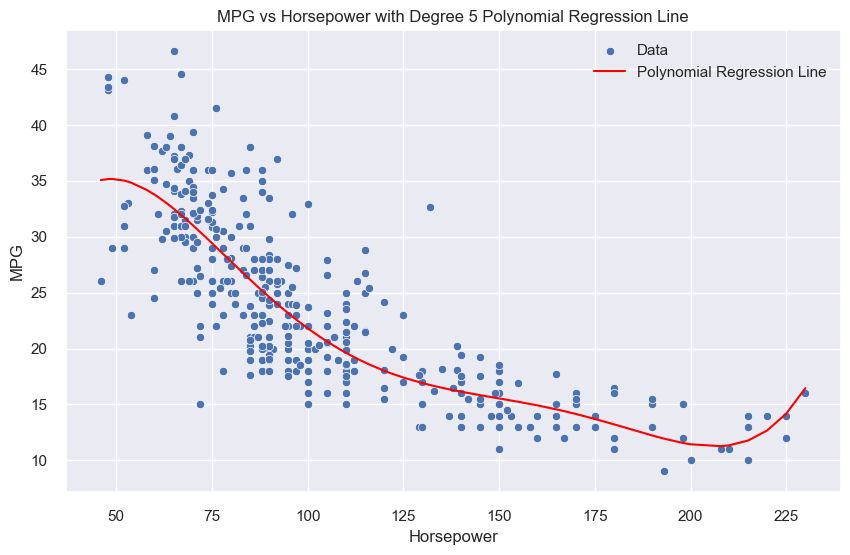

In [67]:
# Degree 5 polynomial
poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred_poly5 = model.predict(X_poly)

# Print model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

# Print model summary

# Print model summary using statsmodels
X_poly_sm = sm.add_constant(X_poly)  # Add constant term for intercept
model_sm = sm.OLS(y, X_poly_sm).fit()
print(model_sm.summary())

# Plot the data and the polynomial regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=df, label='Data')
# Sort the values for a smooth line
sorted_indices = np.argsort(df['hp'])
plt.plot(df['hp'].iloc[sorted_indices], y_pred_poly5[sorted_indices], color='red', label='Polynomial Regression Line')
plt.title('MPG vs Horsepower with Degree 5 Polynomial Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()



## Plot the three models


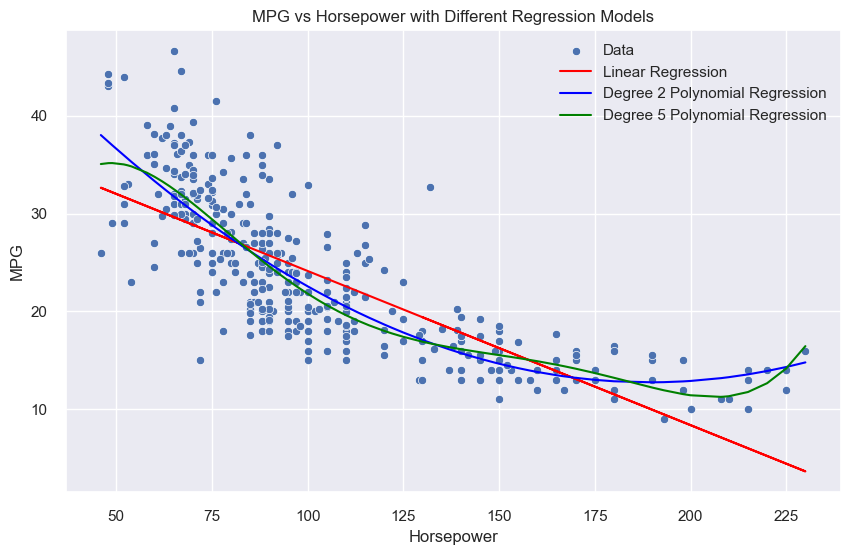

In [68]:
# Three models in one plot

# Plot the data and the three models
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hp', y='mpg', data=df, label='Data')

# Sort the values for a smooth line
sorted_indices = np.argsort(df['hp'])

# Plot linear regression line
plt.plot(df['hp'], y_pred_linear, color='red', label='Linear Regression')

# Plot degree 2 polynomial regression line
plt.plot(df['hp'].iloc[sorted_indices], y_pred_poly2[sorted_indices], color='blue', label='Degree 2 Polynomial Regression')

# Plot degree 5 polynomial regression line
plt.plot(df['hp'].iloc[sorted_indices], y_pred_poly5[sorted_indices], color='green', label='Degree 5 Polynomial Regression')

plt.title('MPG vs Horsepower with Different Regression Models')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()

### What do you see?

Write your impressions and preliminary conclusions about the models.


## Model diagnostics: SLR


In [69]:
# 1. Check for linearity and independence

In [70]:
# 2. Check for normality of residuals (QQ plot)

In [71]:
# 3. Check for homoscedasticity (scale-location plot)

In [72]:
# 4. Check for independence (residuals sorted by regressor vs index plot)

In [73]:
# EXTRA: Check for observed vs predicted

## Model diagnostics: Polynomial Degree 2


In [74]:
# 1. Check for linearity and independence

In [75]:
# 2. Check for normality of residuals (QQ plot)

In [76]:
# 3. Check for homoscedasticity (scale-location plot)

In [77]:
# 4. Check for independence (residuals sorted by regressor vs index plot)

In [78]:
# EXTRA: Check for observed vs predicted

## Conclusion

Add your conclusions and interpretations of the results here. Which model is the best for our _autompg_ dataset and why?
